# Internship

# Project 3:
## Problem Statement:Based on the given dataset predict the  amount of product purchase using  Mutiple  Linear Regression.

In [1]:
# Import all required libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing data

In [17]:
purchase_product=pd.read_csv(r'C:\Users\windows 10\Downloads\purchase_retail.csv')

In [5]:
purchase_product.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
purchase_product.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [7]:
purchase_product.shape

(550068, 12)

In [8]:
purchase_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


# Data Cleaning

In [9]:
purchase_product.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [18]:
# value_counts works as most repeating value in each respective column
purchase_product=purchase_product.iloc[:,:].apply(lambda x:x.fillna(x.value_counts().index[0]))

In [11]:
purchase_product.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [12]:
purchase_product.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


# Data Analysis

In [13]:
purchase_product.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969


## Problem Statement: To print the average of amount of product purchases done by different age people considering their occupation.

In [95]:
def avg_amt_prod_purchase():
    age,uniq_age,occupation,uniq_occupation,amount_of_product_purchases=[],[],[],[],[]
    age=purchase_product.Age
    occupation=purchase_product.Occupation
    uniq_age,uniq_age_counts=np.unique(age,return_counts=True)
    uniq_occupation,uniq_occupation_counts=np.unique(occupation,return_counts=True)
    occu={'Occupation':uniq_occupation}
    new_df=pd.DataFrame(occu)
    a=0
    num=0
    for i in uniq_age:
        amount_of_product_purchases=[]
        for j in uniq_occupation:
            amt_of_prod_purchases=0
            for row in purchase_product.values:
                if(i==row[3] and j==row[4]):
                    amt_of_prod_purchases+=row[11]
                    num+=1
            avg_amt=amt_of_prod_purchases/num
            amount_of_product_purchases.append(avg_amt)
#         print(amount_of_product_purchases)
#         print(a)
#         print(uniq_age[a])
        new_df[uniq_age[a]]=amount_of_product_purchases
        a+=1
    print('The average of amount of product purchases done by different age group people considering their occupation.')
    return new_df
avg_amt_prod_purchase()

The average of amount of product purchases done by different age group people considering their occupation.


,Occupation,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,0,9305.183224,3445.684506,2092.451512,360.344583,83.908190,83.304701,30.725458
1,1,1343.408568,1162.257058,1017.506117,235.539607,139.803511,82.764031,53.399098
2,2,454.765478,1137.896668,639.790516,124.694649,41.536636,24.914330,14.408107
3,3,0.000000,534.882246,384.834897,104.460347,32.988489,19.742669,14.329643
4,4,383.661627,5353.641376,967.587797,44.659198,2.183312,4.632639,0.000000
5,5,0.000000,173.410249,265.130063,73.392046,21.831734,8.129765,0.432094
6,6,0.000000,112.905508,297.787858,122.192824,51.969785,70.958255,11.485829
7,7,500.809393,212.071712,897.655718,447.473081,136.161592,104.196160,38.597668
8,8,103.221317,1.242692,15.997452,1.659213,11.317214,5.589497,2.802904
9,9,0.000000,55.892621,49.753005,68.009861,9.727631,6.898495,3.362148


## Problem Statement: To calculate the population of male and female based on occupation and marital status

In [96]:
def status():
    li=[]
    for row in purchase_product.values:
        li.append(row[4])
    p,freq=np.unique(li,return_counts=True)
    fnsum=0
    mmsum=0
    fmsum=0
    mnsum=0
    fn,fm,mn,mm=[],[],[],[]
    lifn,lifm,limn,limm=[],[],[],[]
    for i in p:
        count=0
        count2=0
        count1=0
        count3=0
        for row in purchase_product.values:
            if(row[4]==i) and (row[2]=='F') and (row[7]==0):
                count=count+1
                fnsum+=row[11]
            elif(row[4]==i) and (row[2]=='F') and (row[7]==1):
                count2=count+1
                fmsum+=row[11]
            elif(row[4]==i) and (row[2]=='M') and (row[7]==0):
                count1=count1+1
                mnsum+=row[11]
            elif(row[4]==i) and (row[2]=='M') and (row[7]==1):
                count3=count3+1
                mmsum+=row[11]
        lifn.append(fnsum)
        lifm.append(fmsum)
        limn.append(mnsum)
        limm.append(mmsum)
        mn.append(count3)
        fn.append(count)
        mm.append(count2)
        fm.append(count1)
    dic={"occupation":p,"Not_Married_Female":fn,'Purchase_Not_Married_female':lifn,'Not_married_male':mn,
         'Purchase_Not_married_male':limn,'Married_Male':mm,'Purchase_married_male':lifm,'Married_Female':fm,
         'Purchase_married_female':lifm}
    x=pd.DataFrame(dic)
    return x
status()

,occupation,Not_Married_Female,Purchase_Not_Married_female,Not_married_male,Purchase_Not_married_male,Married_Male,Purchase_married_male,Married_Female,Purchase_married_female
0,0,10360,90315043,21397,280510329,10361,69568790,30129,69568790
1,1,9848,175446081,14566,416974545,9847,137244478,14876,137244478
2,2,4664,213983364,8317,509153032,4665,171276665,9642,171276665
3,3,4670,256080381,4037,563045010,4668,200887287,5694,200887287
4,4,14173,376490243,15869,930230706,14174,232741746,38603,232741746
5,5,1502,389948770,3851,988225676,1503,238878269,6106,238878269
6,6,4362,430074375,5367,1051906752,4362,272832456,6828,272832456
7,7,5403,478529376,21105,1316778944,5399,315555065,28000,315555065
8,8,361,481908860,855,1319756915,0,315555065,330,315555065
9,9,3008,507251668,418,1320090527,3009,340418744,30,340418744


# Data Visualization

In [ ]:
## Problem Statement: To visualize the 

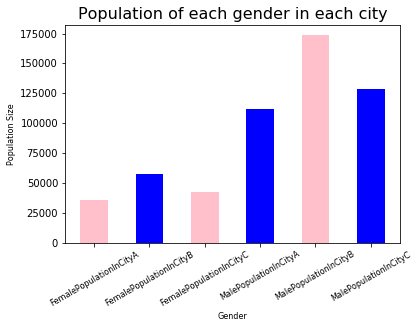

In [37]:
import matplotlib.pyplot as plt
def NoOfMaleFemale():
    FA,FB,FC,MA,MB,MC=0,0,0,0,0,0
    li=[]
    gender=purchase_product.Gender
    city=purchase_product.City_Category
    for i in range(0,550067):
        if(gender[i]=='F' and city[i]=='A'):
            FA+=1
        elif(gender[i]=='F' and city[i]=='B'):
            FB+=1
        elif(gender[i]=='F' and city[i]=='C'):
            FC+=1
        elif(gender[i]=='M' and city[i]=='A'):
            MA+=1
        elif(gender[i]=='M' and city[i]=='B'):
            MB+=1
        elif(gender[i]=='M' and city[i]=='C'):
            MC+=1
    li.append(FA)
    li.append(FB)
    li.append(FC)
    li.append(MA)
    li.append(MB)
    li.append(MC)
    index=['FemalePopulationInCityA','FemalePopulationInCityB','FemalePopulationInCityC','MalePopulationInCityA','MalePopulationInCityB','MalePopulationInCityC']
    x=index
    y=li
    width=1/2
    plt.bar(x,y,width,color=['pink','blue'])
    plt.xlabel('Gender',fontsize=8)
    plt.ylabel('Population Size',fontsize=8)
    plt.title('Population of each gender in each city',fontsize=16)
    plt.xticks(index,fontsize=8,rotation=30)
    plt.show()
NoOfMaleFemale()

# Model Building

In [17]:
purchase_product.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969


In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
purchase_product.Gender=le.fit_transform(purchase_product.Gender)
purchase_product.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,672,0,0,10,0,2,0,3,8.0,16.0,8370
1,0,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,852,0,0,10,0,2,0,12,8.0,16.0,1422
3,0,828,0,0,10,0,2,0,12,14.0,16.0,1057
4,1,2734,1,6,16,2,4,0,8,8.0,16.0,7969


In [19]:
purchase_product.Age=le.fit_transform(purchase_product.Age)
purchase_product.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,1,6,16,C,4+,0,8,8.0,16.0,7969


In [20]:
purchase_product.City_Category=le.fit_transform(purchase_product.City_Category)
purchase_product.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,8.0,16.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,8.0,16.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,16.0,1057
4,1000002,P00285442,1,6,16,2,4+,0,8,8.0,16.0,7969


In [21]:
purchase_product.Stay_In_Current_City_Years=le.fit_transform(purchase_product.Stay_In_Current_City_Years)
purchase_product.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,8.0,16.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,8.0,16.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,16.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,8.0,16.0,7969


In [25]:
purchase_product.Product_ID=le.fit_transform(purchase_product.Product_ID)
purchase_product.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,672,0,0,10,0,2,0,3,8.0,16.0,8370
1,0,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,852,0,0,10,0,2,0,12,8.0,16.0,1422
3,0,828,0,0,10,0,2,0,12,14.0,16.0,1057
4,1,2734,1,6,16,2,4,0,8,8.0,16.0,7969


In [24]:
purchase_product.User_ID=le.fit_transform(purchase_product.User_ID)
purchase_product.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,672,0,0,10,0,2,0,3,8.0,16.0,8370
1,0,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,852,0,0,10,0,2,0,12,8.0,16.0,1422
3,0,828,0,0,10,0,2,0,12,14.0,16.0,1057
4,1,2734,1,6,16,2,4,0,8,8.0,16.0,7969


In [ ]:
sns.pairplot(purchase_product.iloc[1,4])

In [66]:
md1=smf.ols('Purchase~User_ID+Product_ID+Gender+Age+Occupation+City_Category+Stay_In_Current_City_Years+Marital_Status+Product_Category_1+Product_Category_2+Product_Category_3',data=purchase_product).fit()
md1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     7965.
Date:                Sat, 15 Jun 2019   Prob (F-statistic):               0.00
Time:                        00:49:44   Log-Likelihood:            -5.4274e+06
No. Observations:              550068   AIC:                         1.085e+07
Df Residuals:                  550056   BIC:                         1.086e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   1.308e+04     42.656    306.598      0.000     1.3e+04    1.32e+04
User_ID                        0.0122      0.004      3.258      0.001       0.005       0.020
Product_ID                    -0.4012      0.006    -63.957      0.000      -0.414      -0.389
Gender                       539.4136     14.717     36.653      0.000     510.569     568.258
Age                          126.8970      4.956     25.606      0.000     117.184     136.610
Occupation                     6.8499      0.976      7.017      0.000       4.937       8.763
City_Category                343.8394      8.348     41.188      0.000     327.477     360.201
Stay_In_Current_City_Years     8.4086      4.884      1.721      0.085      -1.165      17.982
Marital_Status               -47.7620     13.465     -3.547      0.000     -74.152     -21.372
Product_Category_1          -396.0683      1.714   -231.136      0.000    -399.427    -392.710
Product_Category_2           -10.7212      1.679     -6.385      0.000     -14.012      -7.430
Product_Category_3          -137.3115      2.672    -51.398      0.000    -142.548    -132.075
==============================================================================
Omnibus:                    59031.005   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82103.767
Skew:                           0.857   Prob(JB):                         0.00
Kurtosis:                       3.804   Cond. No.                     2.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
md2=smf.ols('np.log(Purchase)~User_ID+Product_ID+Gender+Age+Occupation+City_Category+Stay_In_Current_City_Years+Marital_Status+Product_Category_1+Product_Category_2+Product_Category_3',data=purchase_product).fit()
md2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Purchase)   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Fri, 14 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:53:40   Log-Likelihood:            -5.5289e+05
No. Observations:              550068   AIC:                         1.106e+06
Df Residuals:                  550056   BIC:                         1.106e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      9.4349      0.006   1560.804      0.000       9.423       9.447
User_ID                     3.642e-07    5.3e-07      0.687      0.492   -6.75e-07     1.4e-06
Product_ID                 -7.133e-05   8.89e-07    -80.233      0.000   -7.31e-05   -6.96e-05
Gender                         0.0461      0.002     22.093      0.000       0.042       0.050
Age                            0.0208      0.001     29.585      0.000       0.019       0.022
Occupation                     0.0005      0.000      3.477      0.001       0.000       0.001
City_Category                  0.0248      0.001     20.928      0.000       0.022       0.027
Stay_In_Current_City_Years     0.0013      0.001      1.938      0.053   -1.54e-05       0.003
Marital_Status                -0.0057      0.002     -2.972      0.003      -0.009      -0.002
Product_Category_1            -0.0803      0.000   -330.722      0.000      -0.081      -0.080
Product_Category_2             0.0035      0.000     14.783      0.000       0.003       0.004
Product_Category_3            -0.0060      0.000    -15.823      0.000      -0.007      -0.005
==============================================================================
Omnibus:                   158944.958   Durbin-Watson:                   1.522
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1059710.789
Skew:                          -1.225   Prob(JB):                         0.00
Kurtosis:                       9.343   Cond. No.                     2.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
md3=smf.ols('np.sqrt(Purchase)~np.sqrt(User_ID)+np.sqrt(Product_ID)+np.sqrt(Gender)+np.sqrt(Age)+np.sqrt(Occupation)+np.sqrt(City_Category)+np.sqrt(Stay_In_Current_City_Years)+np.sqrt(Marital_Status)+np.sqrt(Product_Category_1)+np.sqrt(Product_Category_2)+np.sqrt(Product_Category_3)',data=purchase_product).fit()
md3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.sqrt(Purchase)   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                 1.299e+04
Date:                Fri, 14 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:56:11   Log-Likelihood:            -2.5340e+06
No. Observations:              550068   AIC:                         5.068e+06
Df Residuals:                  550056   BIC:                         5.068e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             127.1694      0.351    361.922      0.000     126.481     127.858
np.sqrt(User_ID)                        0.0015      0.002      0.825      0.409      -0.002       0.005
np.sqrt(Product_ID)                    -0.1484      0.002    -62.978      0.000      -0.153      -0.144
np.sqrt(Gender)                         1.8191      0.076     23.799      0.000       1.669       1.969
np.sqrt(Age)                            2.5117      0.075     33.550      0.000       2.365       2.658
np.sqrt(Occupation)                     0.1832      0.024      7.734      0.000       0.137       0.230
np.sqrt(City_Category)                  1.8311      0.060     30.655      0.000       1.714       1.948
np.sqrt(Stay_In_Current_City_Years)     0.0856      0.054      1.578      0.114      -0.021       0.192
np.sqrt(Marital_Status)                -0.2929      0.070     -4.182      0.000      -0.430      -0.156
np.sqrt(Product_Category_1)           -13.5021      0.042   -324.401      0.000     -13.584     -13.421
np.sqrt(Product_Category_2)             0.1773      0.052      3.420      0.001       0.076       0.279
np.sqrt(Product_Category_3)            -2.0018      0.091    -21.893      0.000      -2.181      -1.823
==============================================================================
Omnibus:                    12145.719   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17254.298
Skew:                           0.256   Prob(JB):                         0.00
Kurtosis:                       3.700   Cond. No.                         733.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
mdR1=smf.ols('Purchase~Stay_In_Current_City_Years',data=purchase_product).fit()
mdR1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     16.17
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           5.78e-05
Time:                        00:15:13   Log-Likelihood:            -5.4681e+06
No. Observations:              550068   AIC:                         1.094e+07
Df Residuals:                  550066   BIC:                         1.094e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   9224.7139     11.880    776.459      0.000    9201.428    9247.999
Stay_In_Current_City_Years    21.1227      5.252      4.022      0.000      10.828      31.417
==============================================================================
Omnibus:                    32205.460   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35642.638
Skew:                           0.600   Prob(JB):                         0.00
Kurtosis:                       2.662   Cond. No.                         4.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\windows 10\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


<Figure size 1440x720 with 0 Axes>

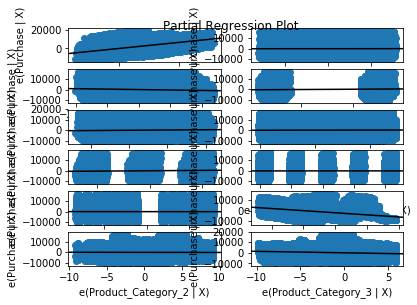

<Figure size 1440x720 with 0 Axes>

In [67]:
sm.graphics.plot_partregress_grid(md1)
plt.figure(figsize=(20,10))

## Method 2: Building model by using test_train method

In [77]:
purchase_product.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [78]:
purchase_product.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [79]:
purchase_product=purchase_product.iloc[:,:].apply(lambda x:x.fillna(x.value_counts().index[0]))

In [80]:
purchase_product.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [81]:
purchase_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [42]:
X=purchase_product.iloc[:,:-1]
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0


In [43]:
y=purchase_product.Purchase
y

0          8370
1         15200
2          1422
3          1057
4          7969
5         15227
6         19215
7         15854
8         15686
9          7871
10         5254
11         3957
12         6073
13        15665
14         5378
15         2079
16        13055
17         8851
18        11788
19        19614
20         8584
21         9872
22         9743
23         5982
24        11927
25        16662
26         5887
27         6973
28         5391
29        16352
          ...  
550038      596
550039      595
550040       26
550041      488
550042      243
550043       48
550044       62
550045      252
550046      236
550047      244
550048      591
550049      473
550050      368
550051      489
550052      239
550053      371
550054       60
550055      238
550056      254
550057       61
550058      121
550059       48
550060      494
550061      599
550062      473
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(440054, 11)
(110014, 11)
(440054,)
(110014,)


In [52]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
y_pred=reg.predict(X_test)

In [55]:
y_pred==y_test

41001     False
16151     False
507262    False
368698    False
353782    False
358687    False
301389    False
278980    False
47994     False
416377    False
266930    False
226794    False
525409    False
490544    False
139180    False
351374    False
194821    False
346419    False
360095    False
249040    False
347094    False
1398      False
148746    False
84873     False
147779    False
103865    False
470708    False
527931    False
435287    False
269847    False
          ...  
263941    False
271136    False
348867    False
219097    False
380213    False
187312    False
352136    False
323647    False
527436    False
333542    False
347436    False
166886    False
54012     False
521367    False
179177    False
361450    False
487327    False
451747    False
112244    False
175476    False
306466    False
532628    False
145199    False
232542    False
317652    False
168473    False
246358    False
105766    False
40384     False
181039    False
Name: Purchase, Length: 

In [56]:
np.mean(y_pred)

9258.750930015056

In [57]:
np.mean(y_test)

9269.135110076899